# Your First Machine Learning Project in Python Step-By-Step

The best way to really come to terms with a new platform or tool is to work through a machine learning project end-to-end and cover the key steps. Namely, from loading data, summarizing data, evaluating algorithms and making some predictions.

If you can do that, you have a template that you can use on dataset after dataset. You can fill in the gaps such as further data preparation and improving result tasks later, once you have more confidence.

## Hello World of Machine Learning

The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).

The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'.

<img src="pic/0_SHhnoaaIm36pc1bd.png">

This is a good project because it is so well understood.

- Attributes are numeric so you have to figure out how to load and handle data.
- It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
- It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
- It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
- All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

## Dataset Loading

In [1]:
import numpy as np
import pandas as pd

# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = 'iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Summarize the Dataset

In this step we are going to take a look at the data a few different ways:

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

### Dimensions of Dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [2]:
# shape
print(dataset.shape)

(150, 5)


### Peek at the Data

It is also always a good idea to actually eyeball your data.

In [3]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        Class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

### Statistical Summary

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [4]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Class Distribution

Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [6]:
# class distribution
print(dataset.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

### Univariate Plots

We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

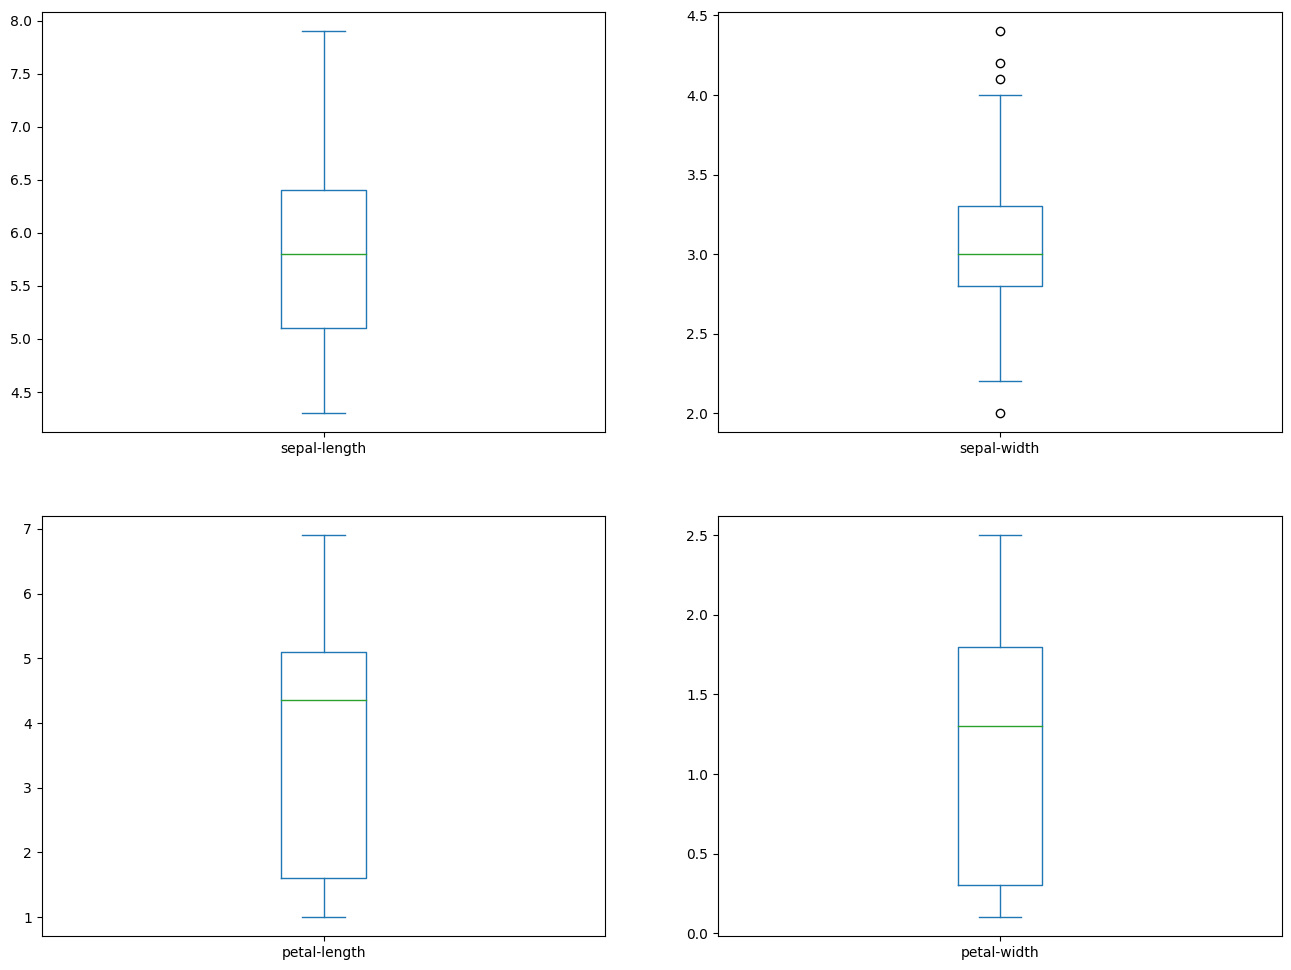

<Figure size 1200x800 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.figure(figsize=(12, 8))
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

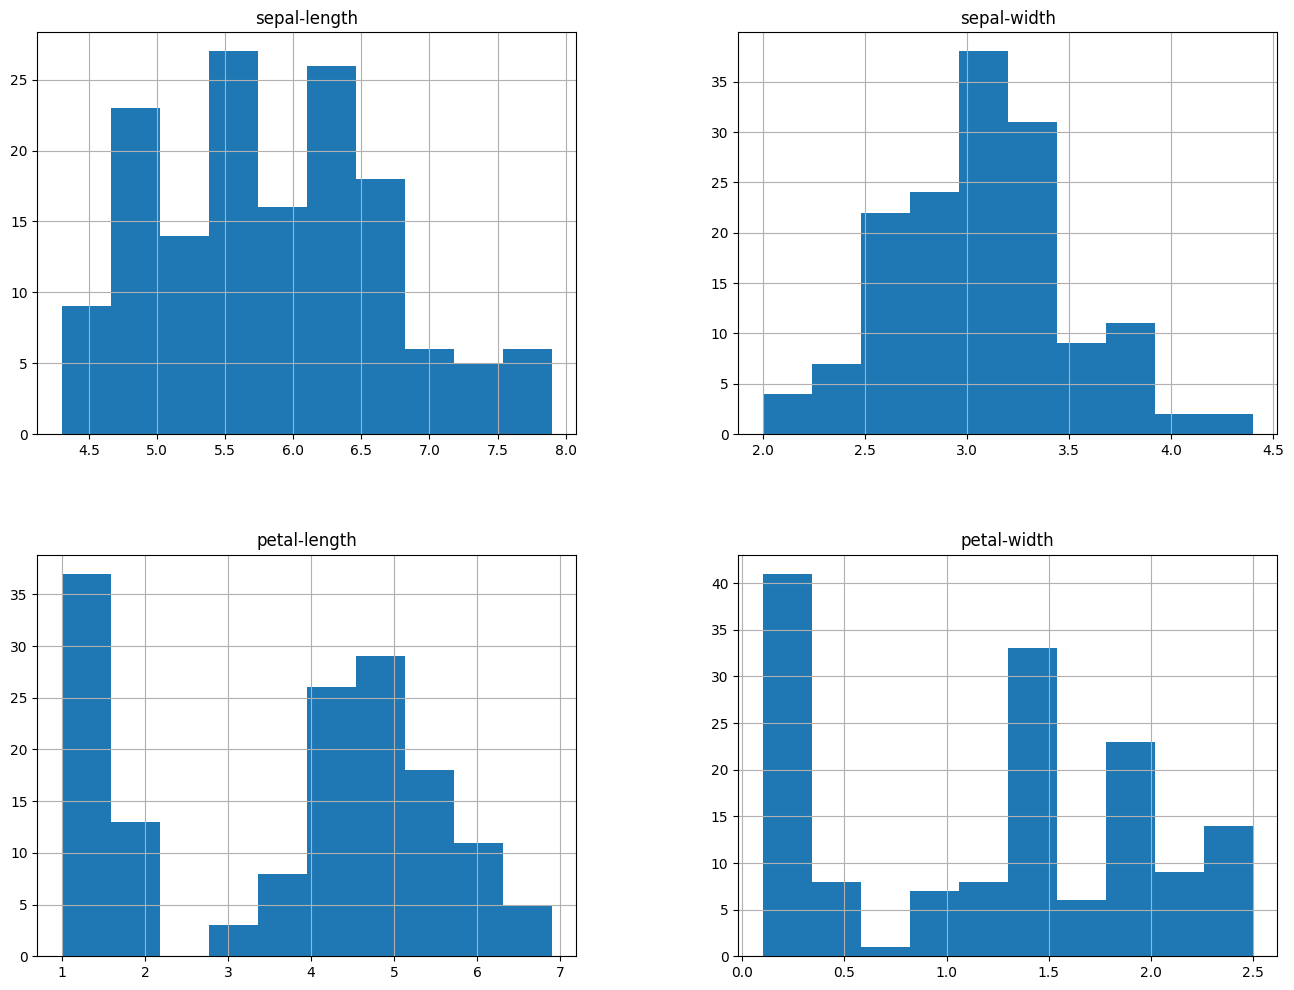

<Figure size 1200x800 with 0 Axes>

In [13]:
# histograms
dataset.hist()
plt.figure(figsize=(12, 8))
plt.show()

### Multivariate Plots

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

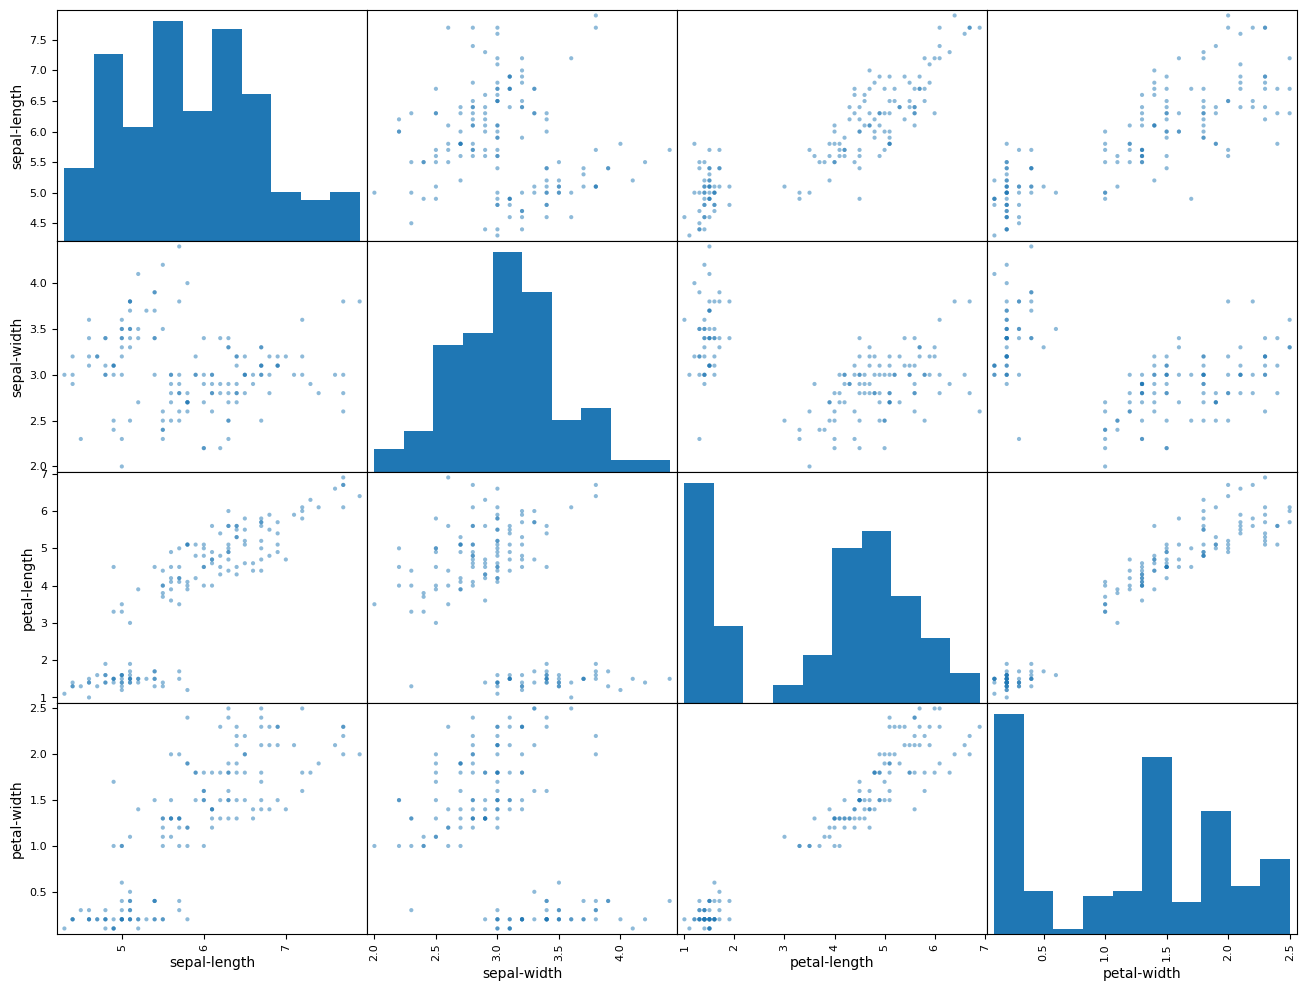

In [15]:
from pandas.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

## Data Preprocessing

### Divide the dataset into a feature set and corresponding labels

In [16]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

### Divide data into training and test sets 

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Evaluatie Some Algorithms

### Test Harness
We will use stratified 10-fold cross validation to estimate model accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

We are using the metric of ‘accuracy‘ to evaluate models.

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

### Build Models

We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 7 different algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).
- Random Forest (RF).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB, SVM and RF) algorithms.

In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(max_depth=2, random_state=0)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.062361)
LDA: 0.975000 (0.053359)
KNN: 0.933333 (0.072648)
CART: 0.933333 (0.062361)
NB: 0.950000 (0.055277)
SVM: 0.958333 (0.041667)
RF: 0.941667 (0.075000)


## Make Predictions

We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [25]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Performance Evaluation

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy:  1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

